In [1]:
# Following tutorial found on http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas
import random
import copy
import csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
# load dataset
df = pandas.read_csv("combined_sliced.csv", sep=',', header=1)
dataset = df.values

In [28]:
print(np.shape(dataset))
print(dataset)

(14998, 31)
[[ 1.51000000e+02  6.94939756e+00 -6.17244000e-01 ...  7.92500000e+03
   7.93000000e+03  0.00000000e+00]
 [ 1.52000000e+02  6.99540019e+00 -6.17768000e-01 ...  8.22500000e+03
   7.90500000e+03  0.00000000e+00]
 [ 1.53000000e+02  7.04140282e+00 -6.18217000e-01 ...  7.89400000e+03
   7.87700000e+03  0.00000000e+00]
 ...
 [ 1.96100000e+04  9.05853812e+02 -6.24272000e-01 ...  8.08300000e+03
   8.35400000e+03  0.00000000e+00]
 [ 1.96110000e+04  9.05899815e+02 -6.24267000e-01 ...  7.98500000e+03
   7.90300000e+03  0.00000000e+00]
 [ 1.96120000e+04  9.05946818e+02 -6.24277000e-01 ...  8.00400000e+03
   7.93600000e+03  0.00000000e+00]]


In [29]:
# trim_start = 200
# trim_end = 8400
X = dataset[:,14:30]
# X = np.delete(X,[1,2,3,4,5,6,10,11,12,13,14,15],1)
print(np.shape(X))
print(X)

# first_values = np.array([-0.616536,-0.067803])
Y = dataset[:,2:4] # for position
print(np.shape(Y))
print(Y)
# Y_temp = [y - first_values for y in Y]
# Y = Y_temp
# print(np.shape(Y))
# print(Y)
# Y_temp = [np.linalg.norm(y) for y in Y]
# Y = Y_temp
# print(np.shape(Y))
# print(Y)

(14998, 16)
[[7929. 7883. 7874. ... 7852. 7925. 7930.]
 [8033. 8207. 7873. ... 7961. 8225. 7905.]
 [7896. 7887. 7912. ... 7847. 7894. 7877.]
 ...
 [7953. 7993. 8119. ... 7992. 8083. 8354.]
 [7852. 7840. 7874. ... 7873. 7985. 7903.]
 [7896. 7865. 7875. ... 7877. 8004. 7936.]]
(14998, 2)
[[-0.617244  -0.0700629]
 [-0.617768  -0.0716122]
 [-0.618217  -0.0730177]
 ...
 [-0.624272  -0.0919751]
 [-0.624267  -0.0919804]
 [-0.624277  -0.0919495]]


In [30]:
X1 = copy.copy(X)
Y1 = copy.copy(Y)

seed = random.random()
random.seed(seed)
random.shuffle(X1)
random.seed(seed)
random.shuffle(Y1)

print(np.shape(X1))
print(X1)
print(np.shape(Y1))
# print(Y1)

(14998, 16)
[[7929. 7883. 7874. ... 7852. 7925. 7930.]
 [7929. 7883. 7874. ... 7852. 7925. 7930.]
 [7929. 7883. 7874. ... 7852. 7925. 7930.]
 ...
 [8015. 7979. 8238. ... 7976. 8071. 8181.]
 [7925. 7839. 7857. ... 7879. 7949. 7907.]
 [8334. 7846. 7859. ... 7852. 7985. 7862.]]
(14998, 2)


In [31]:
X2 = StandardScaler().fit_transform(X1)
Y2 = StandardScaler().fit_transform(Y1)
# Y2 = StandardScaler().fit_transform(np.array(Y1).reshape(-1, 1))
# split into train and test
n_train = len(X2) // 2 
trainX, testX = X2[:n_train, :], X2[n_train:, :]
trainy, testy = Y2[:n_train], Y2[n_train:]
# testX, trainX = X2[:n_train, :], X2[n_train:, :]
# testy, trainy = Y2[:n_train], Y2[n_train:]
print(np.shape(X2))
print(X2)
print(np.shape(Y2))
print(Y2)

(14998, 16)
[[-0.33434514 -0.25925291 -0.46376382 ... -0.55599718 -0.74072997
  -0.17659326]
 [-0.33434514 -0.25925291 -0.46376382 ... -0.55599718 -0.74072997
  -0.17659326]
 [-0.33434514 -0.25925291 -0.46376382 ... -0.55599718 -0.74072997
  -0.17659326]
 ...
 [ 0.4815651   0.70246241  3.08450335 ...  0.66603553  0.47202151
   2.26935762]
 [-0.37229446 -0.70003909 -0.62947959 ... -0.28990941 -0.54137356
  -0.40072422]
 [ 3.50802288 -0.62991402 -0.60998362 ... -0.55599718 -0.24233895
  -0.83924131]]
(14998, 2)
[[ 0.70451663  2.4982677 ]
 [ 0.70451663  2.4982677 ]
 [ 0.70451663  2.4982677 ]
 ...
 [-0.32090049 -0.02196616]
 [ 1.47473397 -1.48723026]
 [-0.02468842  0.11549331]]


Epoch 1/1000
235/235 [==============================] - 1s 3ms/step - loss: 0.8816 - val_loss: 0.9164
Epoch 2/1000
235/235 [==============================] - 1s 2ms/step - loss: 0.7651 - val_loss: 0.8812
Epoch 3/1000
235/235 [==============================] - 0s 2ms/step - loss: 0.7081 - val_loss: 0.8506
Epoch 4/1000
235/235 [==============================] - 0s 2ms/step - loss: 0.6809 - val_loss: 0.8217
Epoch 5/1000
235/235 [==============================] - 1s 2ms/step - loss: 0.6656 - val_loss: 0.8268
Epoch 6/1000
235/235 [==============================] - 1s 3ms/step - loss: 0.6541 - val_loss: 0.8022
Epoch 7/1000
235/235 [==============================] - 1s 2ms/step - loss: 0.6417 - val_loss: 0.8035
Epoch 8/1000
235/235 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.7672
Epoch 9/1000
235/235 [==============================] - 0s 2ms/step - loss: 0.6235 - val_loss: 0.7674
Epoch 10/1000
235/235 [==============================] - 0s 2ms/step - loss: 0.615

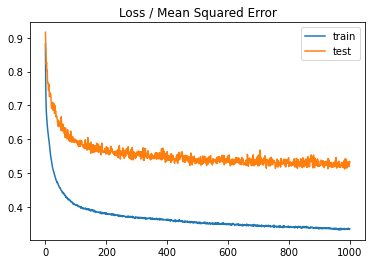

In [33]:
# define model
model = Sequential()
model.add(Dense(16, input_dim=16, kernel_initializer='he_uniform', activation='selu'))
model.add(Dense(8, kernel_initializer='normal', activation='selu'))
model.add(Dense(4, kernel_initializer='normal', activation='selu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=1)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
# make predictions for random indices
randomindices = []
for i in range(11):
	n = random.randint(0,np.shape(X2)[0])
	randomindices.append(n)
print(randomindices)



[2976, 10196, 13139, 13499, 2210, 11195, 904, 11258, 14338, 9100, 7521]


In [35]:
with open('vectors-ball-joint.csv', 'w', newline='') as csvfile:
	for i in randomindices:
		predictions = model.predict(X2[i:i+1]) 
		# print('%s => %s (expected %s) \n' % (X2[i:i+1].tolist(), predictions, Y2[i:i+1]))

		csvwriter = csv.writer(csvfile, delimiter=' ')
		csvwriter.writerow([*predictions[0], *Y2[i:i+1][0]])

In [36]:
df = pandas.read_csv("vectors-ball-joint.csv", sep=' ', header=0) # missing first value cause considered as header but doesn't matter
dataset = df.values
print(len(dataset))
print(dataset)

10
[[ 0.30674183  0.3204611   1.1058433  -0.12453975]
 [-0.06071645  0.4675066   1.35719474 -1.60910435]
 [ 1.4692446   1.2514392   1.85857819 -0.69696286]
 [-0.18204606  1.1202265  -1.25472716  2.16146027]
 [-1.5680736   0.97124046 -3.06905355  1.57242104]
 [-0.7418567  -0.09863971 -0.49803398  0.07175003]
 [ 0.2501554  -0.15548973 -0.08296325  0.01969303]
 [-1.3166142   0.34424013 -0.93102697 -1.17903379]
 [ 0.05931079  0.79449636  0.04821009  0.85330728]
 [-0.7145556   0.19838472 -2.06089897  1.00335059]]


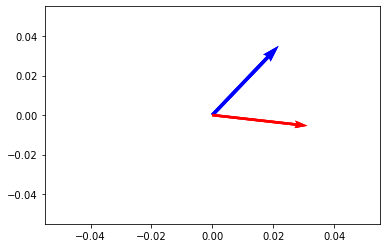

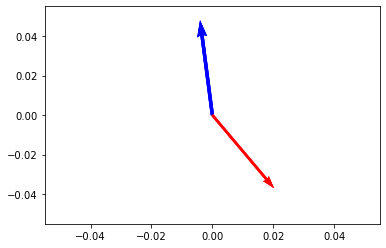

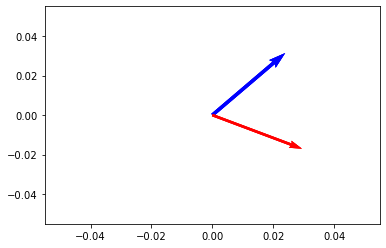

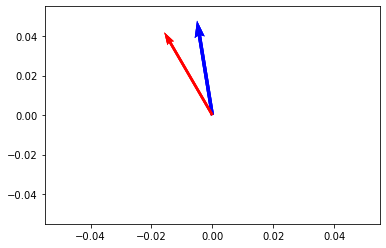

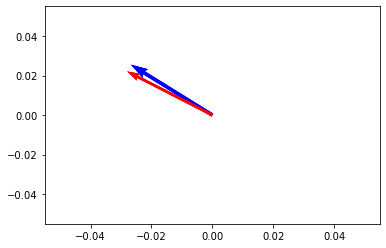

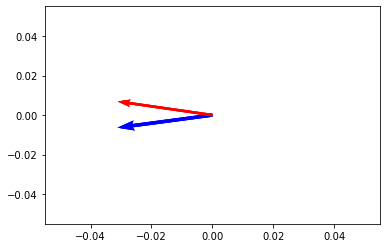

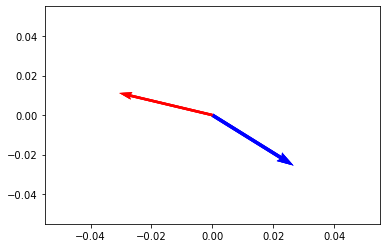

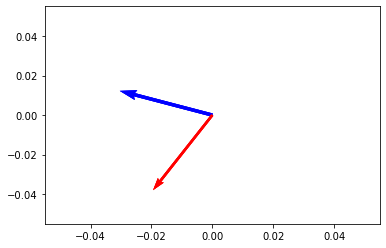

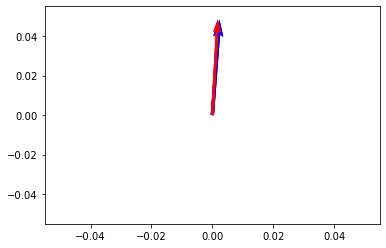

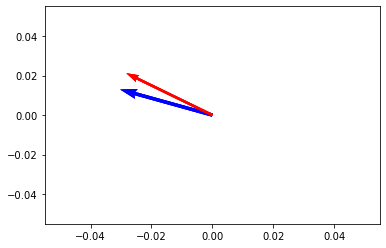

In [37]:
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point
n = 0

for d in dataset:
    n += 1
    vector_real = d[:2]
    norm_real = vector_real/np.linalg.norm(vector_real)
    scaled_real = norm_real 
    # print(d[2])

    # vector_estim = d[3:5]
    vector_estim = d[2:]
    norm_estim = vector_estim/np.linalg.norm(vector_estim)
    scaled_estim = norm_estim
    # print(d[5])

    # plt.quiver(*origin,norm_real[0], norm_real[1], color=['b'], scale=8*abs(d[2]), width=0.01)
    # plt.quiver(*origin,norm_estim[0], norm_estim[1], color=['r'], scale=8*abs(d[5]))
    # plt.savefig('results-3d/vectors-scaled-' + str(n) + '.png')
    plt.quiver(*origin,norm_real[0], norm_real[1], color=['b'], scale=3.5, width=0.01)
    plt.quiver(*origin,norm_estim[0], norm_estim[1], color=['r'], scale=3.5)
    plt.savefig('results-2d/vectors-' + str(n) + '.png')
    plt.show()

In [ ]:
nb = np.linspace(1,len(dataset),len(dataset))
plt.plot(nb, dataset[:,0],label='real')
plt.plot(nb, dataset[:,1],label='predicted')
plt.legend()
plt.show()
